# Theories, Prediction, and the Stanley Cup

The NHL playoffs begin today and with it brings the celebrated tradition of people predicting playoff outcomes and other people yelling at them because their favorite team wasn't chosen as the likely champion. The team with the best record, by far, is the Washington Capitals and as such, are the de-facto favorite to win it all. I noticed recently that several people in the hockey stats world were pretty pessimistic about them; not only were they not projected to win it all, but they weren't even projected to come out of the first round. 

I was pretty interested by this anti-Capitals crowd (or more accurately, the pro-Flyers crowd), so I decided to download some data and play around with building some models. This little project got me thinking a bunch and I decided to share some things. My motivation for writing this post is two-fold: 

1. I think predicting playoff outcomes is a perfect example to highlight the differences between building models for understanding versus models for predictions. 
2. I saw several people claiming that a team other than the New York Rangers will win the Stanley Cup, and that made me really angry. 

I'll let you guess which of these motivations was stronger (hint: it is not the first reason).

## Understanding vs Predicting

Hockey is a relative new-comer in the application of statistics (lovingly called #fancystats in the hockey twittersphere) and is still in the growing pains of figure out what to do and how to it. This applies both to hockey teams and to fans and journalists. One common use of #fancystats is in support of a narrative about who will win a game. Let's take this article, <a href="http://www.tsn.ca/talent/the-nhl-playoffs-through-an-analytical-lens-1.470292">   The Playoffs throug an analytics lens </a> as a case study. The general idea is to look at the advanced statistics for each matchup and use those numbers to inform a prediction about who is more likely to win the series. A few examples: 

> "Offensively, it was the same story: the least shots generated [by the Chicago Blackhaws] of the Joel Quenneville era, creating just 54.0 shots for per-60." In support of the prediction that the Blackhawks will lose to St. Loius.

> "The goal rates are really worth noting, especially since almost all of Florida’s success there was driven by goaltending performance, not team shooting percentage. The former is a much more repeatable and pervasive talent, which means we can have a lot more confidence in their lofty goal differentials than we would in other teams around the league." In support of the prediction that the Panthers will beat the Islanders.

Notice that these arguments inherently rely on some <i>theory</i> about how hockey works. The first is a theory that shot generation (and relatedly, puck possession) is positively associated with winning. The second example has two theories: first that outstanding goaltender performance is a repeatable thing and second that outstanding shooting percentage (goals scored divded by shots taken) is not. All of these theories are perfectly reasonable ones that have solid logic (more shots obviously leads to more goals, which leads to more wins) and data (shooting percentage tends to regress to the mean) to back them up. They are all good ways to understand what goes into winning a hockey game. 


Theoretical explanations, however, are not necessarily the best tool for predicting future outcomes because understandable theories are generally too simple to be effective predictors. Higher puck possession is associated with more wins but by how strong is the relationship? Do puck possession statistics mean different things for different teams? Maybe teams with better goalies rely less on possession (Henrik Lundqvist could tell you a thing or two about that). Does shooting percentages regress to the mean for all teams, or are there some teams that shoot significantly better? In principle, we could throw all of these factors (and any other that you might think of) into a larger theory but as we make that theoretical model more and more complex, we lose the ability to interpret and understand what's going on. 

There are certain tasks where you don't care about understanding as your end goal and I want to argue that predicting outcomes is one of them. If some model tells me that the Rangers will win the Stanley Cup, I don't really care about why it thinks that. I'll want to know how accurate and reliable that estimate is but I'm not concerned about which statistics turn out to matter and which ones don't<sup>1</sup>. 

So my goal with this post is to show a small demonstration towards making playoff predictions using the best practices of predictive machine learning. By "best practices", I really just mean being very careful about evaluating our model. Since we are being so cavalier about what goes into the model and how it works, we need to think critically about how we train and what we get out of it. This involves making sure that we aren't inflating our accuracy numbers by simply predicing the past (<a href="https://statsbylopez.com/2015/05/20/85-is-a-unicorn-on-predictions-in-the-national-hockey-league-postseason/"> looking at you, SAP </a>, [hat tip <a href="https://twitter.com/StatsbyLopez"> @StatsByLopez </a>]) and ensuring that we aren't overfitting too much to the noise in our data. In machine learning parlance, this amounts to using held-out set for evaluating our model's accuracy and using a cross-validation/tuning loop to choose model parameters. 



My language of choice of these things is Python, so here's the game plan:

1. Get a bunch of game data from nhl.com using pandas (in a different notebook). 
2. Generate a bunch of features from that data, also using pandas. 
3. Use scikit-learn to build a model to predict game outcomes using the above data, making sure that we use all the nice regularization/tuning capabilities.
4. Examine model performance on data that we held out while training the model (this prevents the predicting the past problem that SAP apparently has learned about). 
5. Use the model to make some predictions about this year's playoffs. 

If don't care about seeing all that work done and just want the good parts:


# Just the good stuff:

This post might be longer than you care about, so here are quick links to the important parts. 

If you want the data: https://www.dropbox.com/sh/30084mtfipmiuws/AAAR2If1pWkxFm6M0ijWyDDta?dl=0

If you want to see my messy code for gathering and transforming the data: https://github.com/stoddardg/nhl_playoff_predictions

If you want to see Derek Stepan's series winning goal against the Capitals in last year: https://www.youtube.com/watch?v=bDZEd2IRpfE

If you want to see my predictions for this year: 

| Series | Predicted Winner | Prob         
| :- |------------- | :-:
|ANA_NSH | ANA  | 68.1%
|DAL_MIN | DAL  | 52.3%
|LAK_SJS | SJS  | 51.2%
|STL_CHI | STL  | 66.4%



| Series | Predicted Winner | Prob         
| :- |------------- | :-:
|FLA_NYI | FLA  | 54.5%
|TBL_DET | TBL  | 55.8%
|WSH_PHI | WSH  | 54.5%
|PIT_NYR | NYR  | 100%

(My model actually has PIT with a 69.6% chance; however I don't believe in numbers or math so I still go with the Rangers). 


## Disclaimers

1. I'm not claiming that people are doing the wrong things or a bad thing right now with the theory-driven approach to prediction. There are lots of people that do really great work (like <a href="https://twitter.com/Cane_Matt">@cane_matt </a>  and <a href="https://twitter.com/IneffectiveMath"> @ineffectivemath </a> to name a couple). And in fact, a lot of what I do here is inspired by their stuff. I think that the prediction-centric approach in this post can add something to what others are doing. 

2. I have a very limited set of stats in comparison to other people. My data was gathered straight from the NHL's current site and that doesn't include things like possession number for each game and other #fancystats. So I'm starting with the basic measurements but we can still coax something out of them. 

3. The Rangers will win the Stanley Cup, regardless of what any set of numbers tells you. #doItForHenrik 

# Start of Code

The first thing we need to do is get the data. Scraping the data from nhl.com isn't really that hard but doing everything gets a bit messy. For the sake of cleanliness, I'm just going to load the cleaned and transformed data. 

Lines 1&2 just load in the game data. The data starts fromo the 2010-2011 season and goes through the end of this season (I think I might have missed the last weekend of games but I don't think that would change things too much). Each row in regular_season_data looks something like this: 

> home_team_id, away_team_id, home_team_win, [home_team_features], [away_team_features]

The term '[home_team_features]' is a stand-in for 40 different stats derived from the NHL data (basically anything you can get from http://www.nhl.com/stats/team). These are measurements that you know about the team before the game starts, i.e. the Rangers are averaging 30 shots per game prior to the beginning of tonight's playoff game against the Penguins. The features themselves are averages of a bunch of stats (shots for, shots against, save percentage, etc), and the averages are taking over a rolling period of the last 5, 10, and 25 games. So for example here are 3 columns:

> shots_for_rolling_mean_5, shots_for_rolling_mean_10, shots_for_rolling_mean_25 

So that would be the average shots per game over the last 5, 10, and 25 games. Lines 4&5 just load the list of feature the home team and away team. 


In [13]:
regular_season_data = pandas.read_csv('regular_season_data.csv')
playoff_data = pandas.read_csv('playoff_data.csv')

team_features = pickle.load(file('team_stats.txt'))
opponent_features = pickle.load(file('opponent_stats.txt'))


This next part is crucial; this is where we divide the regular_season_data into a training set and a test set. The training set will be used to fit the model (so that's where we'll learn how to predict outcomes) but then we'll evaluate our model on the test set. This avoids the "predicting the past" issue. Notice that we also aren't going to train any playoff data. Hence we can evaluate our classifier's accuracy on the playoffs as well. 

After we split the data into train and test, we then standardize the data so that each column has mean 0 and variance 1. This is good practice any time that you are going to throw data in a machine learning method (although its technically not necessary for tree-based techniques). 

In [14]:
train_data, test_data = train_test_split(regular_season_data)

In [15]:
all_features = team_stats + opponent_stats + ['home_game'] 

scaler = StandardScaler()

X_train_data = scaler.fit_transform(train_data[all_features])
X_test_data = scaler.transform(test_data[all_features])
X_playoff_data = scaler.transform(playoff_data[all_features])



This next cell is where the magic happens, even though there's not a whole lot of code. 


1. We are using a Random Forest (you can see that in line 6) as our base algorithm for predicting. You can read about them here. They key thing to know is that they work well in practice but require some tuning to get right.  

2. The GridSearchCV class allows us to specify different settings of those parameters to try out. Lines 1-5 specifies the parametes and values I want it to search over. GridSearchCV searches over all combinations of parameters and evaluate the quality of each set of parameters by the accuracy via cross-validation over the training set. This steps reduces the chance that we overfit to noise in the data. 

3. After the GridSearchCV chooses the best parameters, it uses those parameters and fits a Random Forest on the entire training set (line 7). We can now use the clf object to make predictions. 

In [28]:
param_grid = dict(
    min_samples_leaf=[10,50,100],
    n_estimators=[100,500,1000],
    max_depth=[1,10, 100]
)
clf = GridSearchCV(RandomForestClassifier(), param_grid)
_= clf.fit(X_train_data, train_data.wins)


# Regular season Accuracy

We now see how the model did. In line 1, we ask the model to make a prediction about who will win the game in the test_set. In line 2, we also ask the model to give the probability that the team will win. We'll use that later. 

The rest of the cell is devoted to estimating the model's accuracy and our uncertainty around that accuracy. This is done via a technique called boostrapping that I'm not going to explain because I would be lying if I said I really understood it. The important intuition is that we can capture an estimate of the range of model accuracy. 

As it turns out, the model's accuracy on the held-out regular season data is 59.6% and we are fairly certain of that estimate; it might be as high as 61.8% in the best or as low as 57.3% in worst case<sup>3</sup>.

In [29]:
test_data['predicted_win'] = clf.predict(X_test_data)
test_data['win_prob'] = [x[1] for x in clf.predict_proba(X_test_data)]

sample_list = []
for i in np.arange(1000):
    bs_sample =  test_data.sample(n=len(test_data), replace=True)
    temp_acc = accuracy_score(bs_sample.wins, bs_sample.predicted_win)
    sample_list.append(temp_acc)

mean_accuracy = np.mean(sample_list) 
lower_bound = np.percentile(sample_list, 2.5)
upper_bound = np.percentile(sample_list, 97.5)

print 'Model accuracy: %s (%s,%s)' % (mean_accuracy, lower_bound, upper_bound)

Model accuracy: 0.596450774336 (0.573561946903,0.618376659292)


# Playoff Accuracy

Now evaluate playoff accuracy (recall that no playoff data was used in training the model). The model is right 68.5% of the time on the playoff data! My intuition is that the number overly optimistic and I just got lucky with this draw of the data but I'll still take it. 

It's really interesting to see that we are actually more accurate on predicting playoff outcomes by a significant margin. In retrospect, this makes a lot of sense for several reasons but I was surprised by it at first (I actually thought the accuracy would decrease for the playoffs).

(Some stats folks out there might point out that I'm not bootstrapping accuracy for the playoffs here because I have lots of repeat observations because the same two teams will play lots of times. That's a valid critique but I'm too lazy right now to rewrite this method). 

In [30]:
print '**** PLAYOFF ACCURACY ****'

playoff_data['predicted_win'] = clf.predict(X_playoff_data)
playoff_data['win_prob'] = [x[1] for x in clf.predict_proba(X_playoff_data)]


sample_list = []
for i in np.arange(1000):
    bs_sample =  playoff_data.sample(n=len(test_data), replace=True)
    temp_acc = accuracy_score(bs_sample.wins, bs_sample.predicted_win)
    sample_list.append(temp_acc)

mean_accuracy = np.mean(sample_list) 
lower_bound = np.percentile(sample_list, 2.5)
upper_bound = np.percentile(sample_list, 97.5)

print 'Model accuracy: %s (%s,%s)' % (mean_accuracy, lower_bound, upper_bound)

**** PLAYOFF ACCURACY ****
Model accuracy: 0.685943584071 (0.665915376106,0.70685840708)


# Examining win probabilities

In addition to just asking which team is likely to win, we can also ask the model to give us a probability of the home team winning. We'd hope that if we looked at all games where we said the home team had a 60% of winning, then the home team would win 60% of the time. So let's just plot the predicted win rate versus the empirical win rate (using a logistic regression to fit that curve). 

We do that below and it seems that our model is too conservative for both the regular season and playoff data, but it is more conservative for the playoffs. In cases where we said the home team had a 60% chance of winning, the home team tends to win more than 60% of the time. There are lots of reasons why this might be the case but its not something I want to fix just now. We should keep it in mind when interpreting the projected playoff outcomes for this year though (because it seems we'll be underestimating the chances of the favorite). 

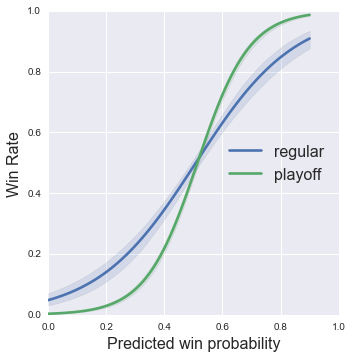

In [23]:
heldout_data = pandas.concat([test_data, playoff_data])

seaborn.lmplot(x='win_prob',y='wins',data=heldout_data, logistic=True, hue='game_type', scatter=False, legend=False)
_= plt.xlim(0,1)
_= plt.ylim(0,1)
_= plt.legend(fontsize=16, loc='center right')
_= plt.xlabel("Predicted win probability", fontsize=16)
_= plt.ylabel("Win Rate", fontsize=16)

# Predictions for round 1

Now let's make predictions and wrap it up. We'll load the file with the round 1 matchup data, transform the data, and then let the model make some predictions about the win probabilities for eaach team. That will give us the game-level probabilities and then we'll do some simulations to figure out the probability of the winning the series. 

The code here is just messy and this post is too long, so I'll cut the explanation here. 

In [33]:
schedule_df = pandas.read_csv('round_1_schedule.csv')
playoff_prob_prediction = clf.predict_proba(scaler.transform(schedule_df[all_features]))

schedule_df['home_team_win_prob'] = [x[1] for x in playoff_prob_prediction]

In [36]:
def get_game_winner(row):
    if row['home_team_win'] == 1:
        return row['home_team']
    return row['away_team']


temp_series_winners = []

for i in np.arange(2000):
    temp_df = schedule_df.copy()
    temp_df['home_team_win'] = scipy.stats.bernoulli.rvs(temp_df.home_team_win_prob)


    temp_df['game_winner'] = temp_df.apply(lambda x: get_game_winner(x), axis=1)


    for series, temp_data in temp_df.groupby('series_name'):
        winner =  temp_data.game_winner.value_counts().argmax()
        temp_series_winners.append(dict(series_name=series, winner=winner))
        
blah = pandas.DataFrame(temp_series_winners)
print blah.groupby('series_name')['winner'].value_counts(normalize=True)

series_name  winner
ANA_NSH      ANA       0.6810
             NSH       0.3190
DAL_MIN      DAL       0.5230
             MIN       0.4770
FLA_NYI      FLA       0.5455
             NYI       0.4545
LAK_SJS      SJS       0.5120
             LAK       0.4880
PIT_NYR      PIT       0.6960
             NYR       0.3040
STL_CHI      STL       0.6645
             CHI       0.3355
TBL_DET      TBL       0.5580
             DET       0.4420
WSH_PHI      WSH       0.5455
             PHI       0.4545
dtype: float64
CPU times: user 36.7 s, sys: 277 ms, total: 36.9 s
Wall time: 38.1 s


# Future Work

There's a lot more to do but the two main ways to improve this are: 

1. Get better data. I really wish I had data with more advanced shot metrics, zone entry summaries, etc. Better data always beats better methods, so I wish I had some of that better data. 

2. Calibrate the predicted probabilities. If I really wanted to get more accurate estimates on series probabilities for this year, I would be more concerned that the projected win rates and empirical win rates don't match up. It seems like that could be improved (maybe by just scaling by the logistic regression) but I would need to think about it more. 

## imports

In [24]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats


import pandas
import numpy as np

import pickle

import warnings
warnings.filterwarnings('ignore')
